# 2021 W34：“Entry-level” jobs on LinkedIn require 3+ years of experience

## Import packages

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

## Read data

In [2]:
df = pd.read_excel('../data/Entry-Level LinkedIn Jobs.xlsx', index_col=0)

In [3]:
df['not_require'] = 1.0 - df['"Entry-level" jobs on LinkedIn require 3+ years of experience']

In [4]:
df

,"""Entry-level"" jobs on LinkedIn require 3+ years of experience",not_require
Job,,
Software & IT Services,0.603,0.397
Manufacturing,0.500,0.500
Design,0.470,0.530
Education,0.450,0.550
Finance,0.438,0.562
Nonprofit,0.379,0.621
Wellness & Fitness,0.350,0.650
Media & Communications,0.286,0.714
Healthcare,0.241,0.759


## Visualization

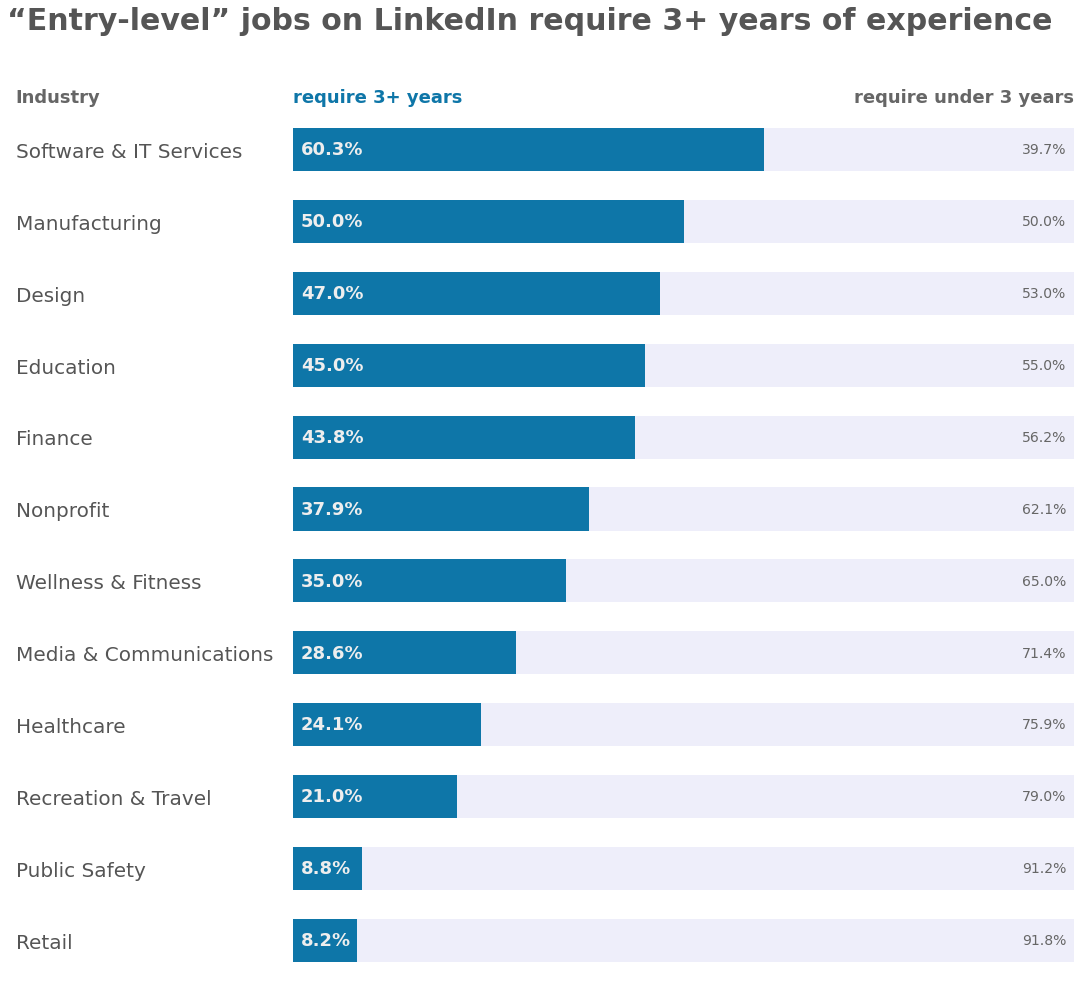

In [5]:
fig, ax = plt.subplots(figsize=(14,16))
fig.suptitle('“Entry-level” jobs on LinkedIn require 3+ years of experience',
             x=0.36,
             y=0.97, 
             fontsize=30,
             fontweight='bold',
             color='#555555')
df.plot.barh(
        legend=None, 
        fontsize=20,
        width=0.6,
        stacked=True,
        color=['#0e76a8', '#eeeefa'], # Set Linkedin brand color for main color 
        ax=ax)


ax.patch.set_alpha(0)
ax.spines[:].set_visible(False)
ax.set(xlim=[0,1], xticks=[], ylabel=None)

widths = []
fig.canvas.draw()
for label in ax.get_yticklabels():
    label.set_horizontalalignment('left')
    widths.append(label.get_window_extent().width)
    
ax.tick_params(axis='y', length=0, labelcolor='#555555', pad=max(widths)+20)

    
for i, vals in enumerate(df.values):
    ax.text(0.01, i, f'{vals[0]*100:.1f}%', 
            ha='left', 
            va='center', 
            color='#eeeeee',
            fontweight='bold',
            size=18)
    
    ax.text(0.99, i, f'{vals[1]*100:.1f}%', 
            ha='right', 
            va='center', 
            color='#666666', 
            size=14)
    
ax.text(-0.355, -0.6, 'Industry', 
        ha='left', 
        va='bottom', 
        size=18, 
        color='#666666', 
        fontweight='bold')
  
ax.text(0, -0.6, 'require 3+ years', 
        ha='left', 
        va='bottom', 
        size=18, 
        color='#0e76a8', 
        fontweight='bold')

ax.text(1, -0.6, 'require under 3 years', 
        ha='right', 
        va='bottom', 
        size=18, 
        color='#666666', 
        fontweight='bold')

ax.invert_yaxis()

save_dir = Path('../fig')
save_name = list(Path.cwd().glob('*.ipynb'))[0].stem
fig.savefig(save_dir / f'{save_name}.png', transparent=False, bbox_inches='tight')